# Homework 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction
from sklearn.metrics import pairwise_distances

from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Exercise 4.5

<img src="figures/homework-22/exercise-4.5.png" width="600" />








<div class="sidenote">
Suppose $\mathcal{R}_k$ is a convex set in a real vector space and $g_k : \mathcal{R}_k \to \mathbb{R}$ is a function.

Then we can define a convex function. The function $g_k(\cdot)$ is **convex** if for all pairs of samples $\mathbf{x}_1 \in \mathcal{R}_k$ and $\mathbf{x}_2 \in \mathcal{R}_k$ and for all $\lambda \in [0, 1]$, we have:

$$
        g_k(\lambda \mathbf{x}_1 + (1-\lambda) \mathbf{x}_2) \leq  
\lambda g_k(\mathbf{x}_1) + (1-\lambda) g_k(\mathbf{x}_2)
$$
<div>

We know that $\mathbf{x}_1$ and $\mathbf{x}_2$ belong to class $k$. This means that the decision function $g_k(\cdot)$ will yield a larger value i.e., the distance to the separating hyperplane will be larger than another decision function $g_l(\cdot)$. Therefore, for the two given samples, we can write:


<img src="figures/homework-22/solution-4.5a.png" width="600" />







<img src="figures/homework-22/solution-4.5b.png" width="600" />







<div class="warning">
Where does the second $\mathbf{w}_{l0}$ come from in Equation (4.27)?
<div>

Equation (4.27) gives us the follow:

<img src="figures/homework-22/solution-4.5c.png" width="600" />


Since we know that $g_l(\mathbf{x}_1) < g_k(\mathbf{x}_1)$ and $g_l(\mathbf{x}_2) < g_k(\mathbf{x}_2)$, we can substitute the expressions from 4.25 and 4.26 and change the equality size to an inequality:

<img src="figures/homework-22/solution-4.5d.png" width="600" />


Now we can write:

<div class="warning">
Why can we do this?
<div>

\begin{align}
g_l(\mathbf{z}) 
&= 
  \mathbf{w}_k^T \left[ \lambda \mathbf{x}_1 + (1-\lambda) \mathbf{w}^T\mathbf{x}_2 \right] + w_{k0}\\
&= 
  \mathbf{w}_k^T \mathbf{z} + w_{k0} \\
&= 
  g_k(\mathbf{z})
\end{align}

---
## Exercise 4.6

<img src="figures/homework-22/exercise-4.6.png" width="600" />








Suppose we have $N$ samples $\mathbf{x}_i \in \mathbb{R}^D$ in two different classes. 

Suppose we pick any two samples so that
- $\mathbf{x}_{pos}$ belongs to the positive class
- $\mathbf{x}_{neg}$ belongs to the negative class

We can make each sample distinct by augmenting them with their corresponding label as follows:
- $\tilde{\mathbf{x}}_{pos} = [\mathbf{x}_{pos}^T, 1]^T$
- $\tilde{\mathbf{x}}_{neg} = [\mathbf{x}_{neg}^T, -1]^T$

Notice that we have mapped our samples from both classes to a higher dimension.

Given a linear decision function $g(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$, all samples can be classified correctly using the following weight vector:

$$
\mathbf{w} = 
  \begin{bmatrix}
  0\\0\\ \vdots \\ 1
  \end{bmatrix}
$$

Another approach:

<img src="figures/homework-22/solution-4.6.png" width="600" />















---
## Exercise 4.7

<img src="figures/homework-22/exercise-4.7.png" width="600" />














<div class="warning">
Why can we do this? Restudy!
<div>



<img src="figures/homework-22/solution-4.7.png" width="600" />




---
## Exercise 5.1

<img src="figures/homework-22/exercise-5.1.png" width="600" />








In [75]:
def plot_svm(c1, c2, w, w_origin, margin, support_vectors, xlim=(-2, 2), ylim=(-2, 2)):
    #fig, ax = utils.prepare_plot(c1[0,:], c1[1,:], xlimit=(-0.5, 2.5), ylimit=(-0.5, 2.5), figsize=(8,8))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.scatter(c1[0,:], c1[1,:], label='Positive Class', )
    ax.scatter(c2[0,:], c2[1,:], label='Negative Class')

    coords = np.arange(-100, 100, 1) 
    
    # Draw decision function
    x1_coords = (-(coords * w[1]) / w[0])  + w_origin[0]
    x2_coords = (-(x1_coords * w[0]) / w[1]) + w_origin[1]
    ax.plot(x1_coords, x2_coords, color='black', label='Decision function')

    # Draw the margin
    x1_coords = (-(coords * w[1]) / w[0])  + w_origin[0] + margin
    x2_coords = (-(x1_coords * w[0]) / w[1]) + w_origin[1] + margin
    ax.plot(x1_coords, x2_coords, color='grey', linestyle='dashed', label='Margin Lines')

    x1_coords = (-(coords * w[1]) / w[0])  + w_origin[0] - margin
    x2_coords = (-(x1_coords * w[0]) / w[1]) + w_origin[1] - margin
    ax.plot(x1_coords, x2_coords, color='grey', linestyle='dashed')

    # Draw the weight vector
    arrow_x1 = 0.5
    arrow_x2 = (-arrow_x1 * w[0] / w[1])  + w_origin[1]
    w = w / np.linalg.norm(w)
    ax.arrow(arrow_x1, arrow_x2, w[0], w[1], color='black', head_width=0.07, head_length=0.1)
    
    ax.scatter(support_vectors[0,:], support_vectors[1,:], 
               facecolors='none', edgecolors='grey', s=150, label='Support Vectors')

    ax.legend();
    return None

In [76]:
c1 = np.array([[1, 2, 2],
               [1, 2, 0]])
c2 = np.array([[0, 1, 0],
               [0, 0, 1]])

In [77]:
X = np.concatenate([c1, c2], axis=1)
y_c1 = np.ones(c1.shape[1])
y_c2 = -np.ones(c2.shape[1])
y = np.concatenate([y_c1, y_c2])

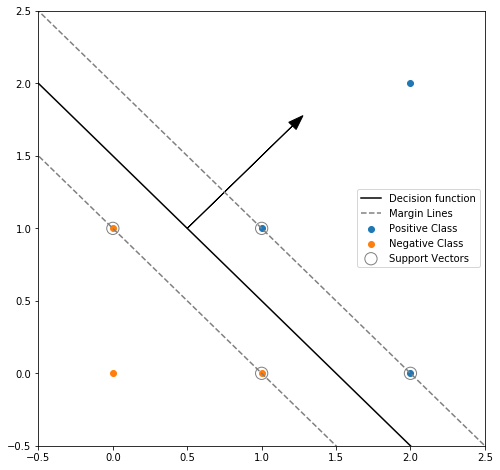

In [78]:
w = np.array([1.0, 1.0])
w_origin = [1.5, 1.5]
margin = 0.5
support_vectors = np.array([[1, 0, 1, 2],
                            [0, 1, 1, 0]])
xlim = -0.5, 2.5
ylim = -0.5, 2.5
plot_svm(c1, c2, w, w_origin, margin, support_vectors, xlim, ylim)

---
## Exercise 5.2

<img src="figures/homework-22/exercise-5.2.png" width="600" />








We need to show that the kernel matrix $\mathbf{K}$ in the dual problem formulation of SVM must be a positive definite in order to find a solution:

<div class="warning">
Correct?
<div>

Recall how quadratic functions are defined:

<img src="figures/homework-22/recall-quadratic-functions.png" width="600" />







The Hessian of $f$ is $F(\mathbf{x})= \mathbf{Q}$.

<div class="warning">
So in order for a quadratic function to a have a solution, the Hession of the function must be symmetric positive definite matrix.
Correct?
<div>

<img src="figures/homework-22/solution-5.2a.png" width="600" />






The formulation is a quadratic function. The first partial derivative of $\mathcal{J}_{a}$ is:

<img src="figures/homework-22/solution-5.2b.png" width="600" />






The Hessian is:

<img src="figures/homework-22/solution-5.2c.png" width="600" />






<img src="figures/homework-22/solution-5.2d.png" width="600" />








---
## Exercise 5.3: 

<center><b>Show that the linear SVM classifier always finds the optimal hyper-plane in the linear case.</b></center>







<img src="figures/homework-22/solution-5.3a.png" width="600" />













<img src="figures/homework-22/solution-5.3b.png" width="600" />



---
## Exercise 5.4

<img src="figures/homework-22/exercise-5.4.png" width="600" />






<div class="warning">
Restudy!
<div>

<img src="figures/homework-22/solution-5.4a.png" width="600" />




<img src="figures/homework-22/solution-5.4b.png" width="600" />























<img src="figures/homework-22/solution-5.4c.png" width="600" />






